## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:

# Combine the data into a single dataset
mousedata_studyresults = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mousedata_studyresults

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [73]:
# Checking the number of mice.
total_unique_values = mousedata_studyresults.nunique()
total_mice = total_unique_values["Mouse ID"]

print(f"The total number of mice is {total_mice}")

The total number of mice is 249


In [17]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mousedata = mousedata_studyresults.loc[mousedata_studyresults.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()


# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mousedata

array(['g989'], dtype=object)

In [19]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# what i initially tried
# clean_mousedata_studyresults = mousedata_studyresults[mousedata_studyresults.drop_duplicates(['Mouse ID','Timepoint'])]

# Checking the number of mice in the clean DataFrame.
clean_mousedata_studyresults = mousedata_studyresults[mousedata_studyresults['Mouse ID'].isin(duplicate_mousedata)==False]


clean_mousedata_studyresults.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
import numpy as np

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
meanTV_drug = clean_mousedata_studyresults.groupby(by=['Drug Regimen']).mean()
sum_meanTV = meanTV_drug["Tumor Volume (mm3)"]

medianTV_drug = clean_mousedata_studyresults.groupby(by=['Drug Regimen']).median()
sum_medianTV = medianTV_drug["Tumor Volume (mm3)"]

varianceTV_drug = clean_mousedata_studyresults.groupby(by=['Drug Regimen']).var()
sum_varTV = varianceTV_drug["Tumor Volume (mm3)"]

stdTV_drug = clean_mousedata_studyresults.groupby(by=['Drug Regimen']).std()
sumb_stdTV = stdTV_drug["Tumor Volume (mm3)"]

semTV_drug = clean_mousedata_studyresults.groupby(by=['Drug Regimen']).sem()
sum_semTV = semTV_drug["Tumor Volume (mm3)"]


# Assemble the resulting series into a single summary dataframe.

summary_TV_bydrug = pd.DataFrame({"Drug":sum_meanTV.index,
                                "Mean":sum_meanTV.values,
                                 "Median" :sum_medianTV.values,
                                "Variance" : sum_varTV.values,
                               "SEM"  : sum_semTV.values,
                              "StD"  : sumb_stdTV.values})



In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Here's my initial code:
#  tsummary_TV_bydrug = summary_TV_bydrug.groupby(by="Drug Regimen")???

summary_TV_bydrug

# Using the aggregation method, produce the same summary statistics in a single line


,Drug,Mean,Median,Variance,SEM,StD
0,Capomulin,40.675741,41.557809,24.947764,0.329346,4.994774
1,Ceftamin,52.591172,51.776157,39.290177,0.469821,6.268188
2,Infubinol,52.884795,51.820584,43.128684,0.492236,6.567243
3,Ketapril,55.235638,53.698743,68.553577,0.603860,8.279709
4,Naftisol,54.331565,52.509285,66.173479,0.596466,8.134708
5,Placebo,54.033581,52.288934,61.168083,0.581331,7.821003
6,Propriva,52.320930,50.446266,43.852013,0.544332,6.622085
7,Ramicane,40.216745,40.673236,23.486704,0.320955,4.846308
8,Stelasyn,54.233149,52.431737,59.450562,0.573111,7.710419
9,Zoniferol,53.236507,51.818479,48.533355,0.516398,6.966589


## Bar and Pie Charts

<AxesSubplot:title={'center':'Total Measurments by Drug Regimen'}>

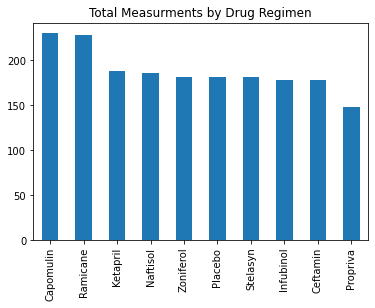

In [51]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# # my first crack at it
# timepoint_and_drug = clean_mousedata_studyresults[['Drug Regimen','Timepoint']]
# # timepoint_and_drug= timepoint_and_drug.set_index("Drug Regimen")

# timepoint_and_drug.plot(kind='bar', figsize=(20,10))

plt.title("Total Measurments by Drug Regimen")

measurement_counts = clean_mousedata_studyresults['Drug Regimen'].value_counts()
measurement_counts.plot(kind="bar")

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.


# # my initial crack at it
# x_axis = np.arange(0, len(sum_meanTV.index)
# tick_location = [value for value in x_axis]
    
# plt.title("Total Measurments by Drug Regimen")
# plt.xlabel("Drug Regimen")
# plt.ylabel("Total Measurments")
# plt.bar(x_axis, clean_mousedata_studyresults['Timepoint'], facecolor="blue", alpha=.075, align="center")




<AxesSubplot:title={'center':'Distribution by Sex'}, ylabel='Sex'>

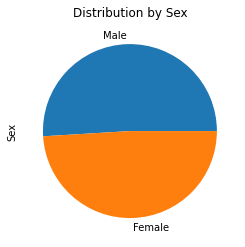

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

plt.title("Distribution by Sex")

sex_counts = clean_mousedata_studyresults['Sex'].value_counts()
sex_counts.plot(kind="pie")



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [107]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

max_tumorgroups = clean_mousedata_studyresults.groupby(["Mouse ID"])["Timepoint"].max()



max_tumorgroups.head()
# Start by getting the last (greatest) timepoint for each mouse]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint




clean_mousedata_studyresultsm1 =   clean_mousedata_studyresults.merge(max_tumorgroups, on=["Mouse ID","Timepoint"])

clean_mousedata_studyresultsm1


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
